In [1]:
import numpy as np

from datetime import datetime
import pandas as pd



%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

In [2]:

mpl.rcParams['figure.figsize'] = (50, 20)
sns.set(style="darkgrid")

In [3]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

date  Afghanistan  Albania  Algeria  Andorra  Angola  \
226  2020-09-04        38304     9967    45773     1215    2876   
225  2020-09-03        38288     9844    45469     1199    2805   
224  2020-09-02        38243     9728    45158     1199    2777   
223  2020-09-01        38196     9606    44833     1184    2729   
222  2020-08-31        38165     9513    44494     1176    2654   

     Antigua and Barbuda  Argentina  Armenia  Australia  ...  Kenya  \
226                   95     461882    44461      26207  ...  34884   
225                   95     451198    44271      26136  ...  34705   
224                   94     439172    44075      26049  ...  34493   
223                   94     428239    43878      25923  ...  34315   
222                   94     417735    43781      25819  ...  34201   

     Korea, South  Kosovo  Kuwait  Kyrgyzstan  Laos  Latvia  Lebanon  Lesotho  \
226         21010   12683   88243       44199    22    1416    19490     1148   
225         20842   12683   87378       44135    22    1410    18963     1085   
224         20644   12683   86478       44036    22    1406    18375     1085   
223         20449   12683   85811       43958    22    1404    17777     1085   
222         20182   12683   85109       43898    22    1396    17308     1085   

     Liberia  
226     1306  
225     1306  
224     1305  
223     1305  
222     1304  

[5 rows x 101 columns]

<Figure size 3600x1440 with 0 Axes>

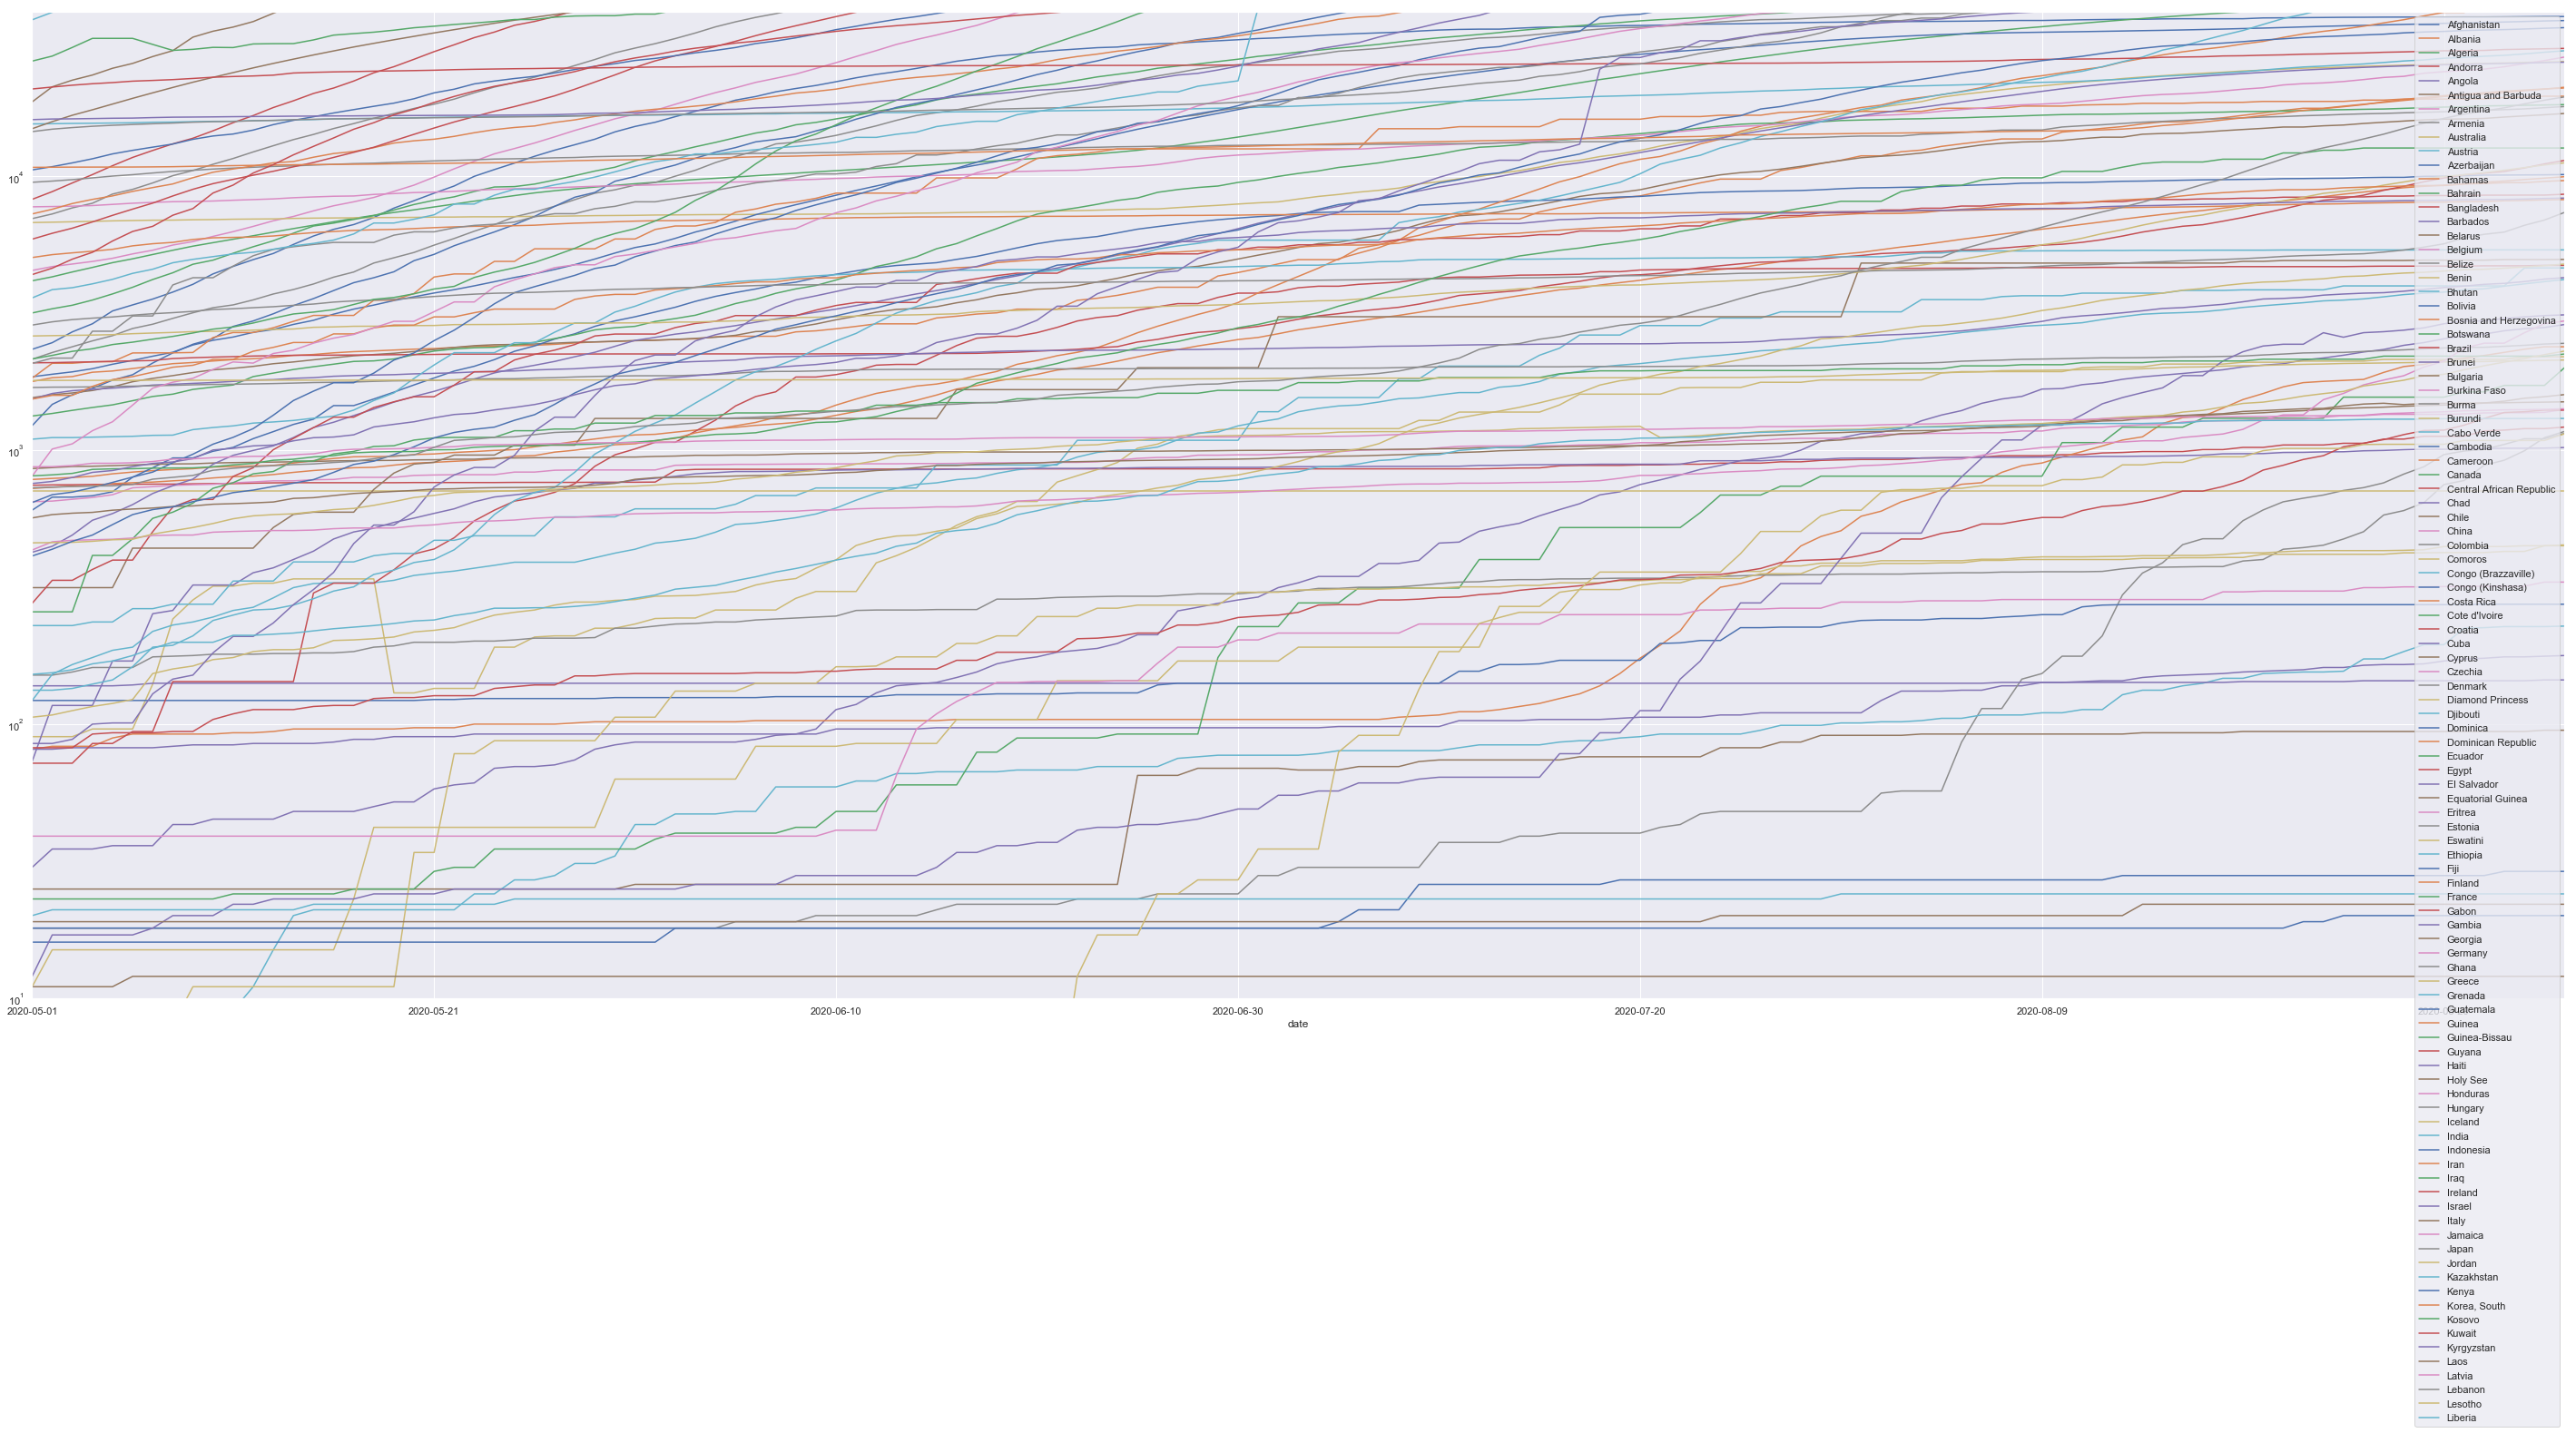

In [4]:
fig = plt.figure();
ax=df_plot.iloc[100:,:].set_index('date').plot()
plt.ylim(10, 40000)
ax.set_yscale('log')

plt.show()

In [5]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
country_list = []
for col in pd_raw.columns:
        val = list(pd_raw['Country/Region'])
        for v in val:
            country_list.append(v)
country_list = list(dict.fromkeys(country_list))
country_list = country_list[:5]
country_list




['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [6]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=1,
                                marker_size=4, 
                                name = each
                                 )
                     )
fig.update_layout(
    width=1024,
    height=1024,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
fig.update_layout(legend_title_text='Countries')
fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()

In [7]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

In [8]:
app = dash.Dash()
app.layout = html.Div([   
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id='country_drop_down',
            options=[
               {'label': each, 'value': each}
                    for each in country_list],
        value=['Afghanistan'], # which are pre-selected
        multi=True
    ),   
       
    
    dcc.Graph(figure=fig, id='main_window_slope')
                      ])

In [ ]:
from dash.dependencies import Input, Output
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [ ]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
